# Chapter 10

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pip install pydicom

In [3]:
%matplotlib inline
import skimage
print(skimage.__version__)

import numpy as np
import PIL as pil

from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat

from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, viewer, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage

from skimage import viewer
from skimage.viewer import ImageViewer
# https://scikit-image.org/docs/dev/user_guide/viewer.html

import skimage as skim
import skimage.io as skim_io
import skimage.transform as skim_tr
import skimage.util as skim_ut

import matplotlib.image as mpimg
import matplotlib.pylab as plt

from scipy.ndimage import affine_transform, zoom
from scipy import misc
import scipy.ndimage
import scipy 

0.16.2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Viewer requires Qt
  del sys.path[0]


In [4]:
!pip install scipy
!pip install "scipy==1.1.0"

#### Image Measurements

##### Labeling

thresh= 126
1818.3863803620782 917.7862200925638
655.2134453575972 1002.8140226005283


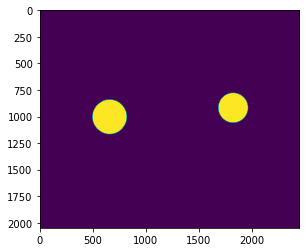

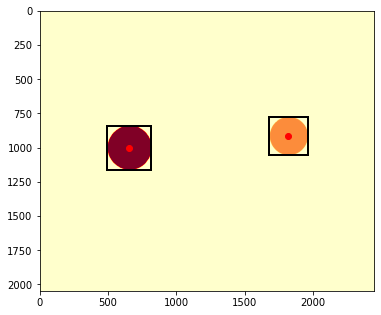

1818.3863803620782 917.7862200925638
655.2134453575972 1002.8140226005283


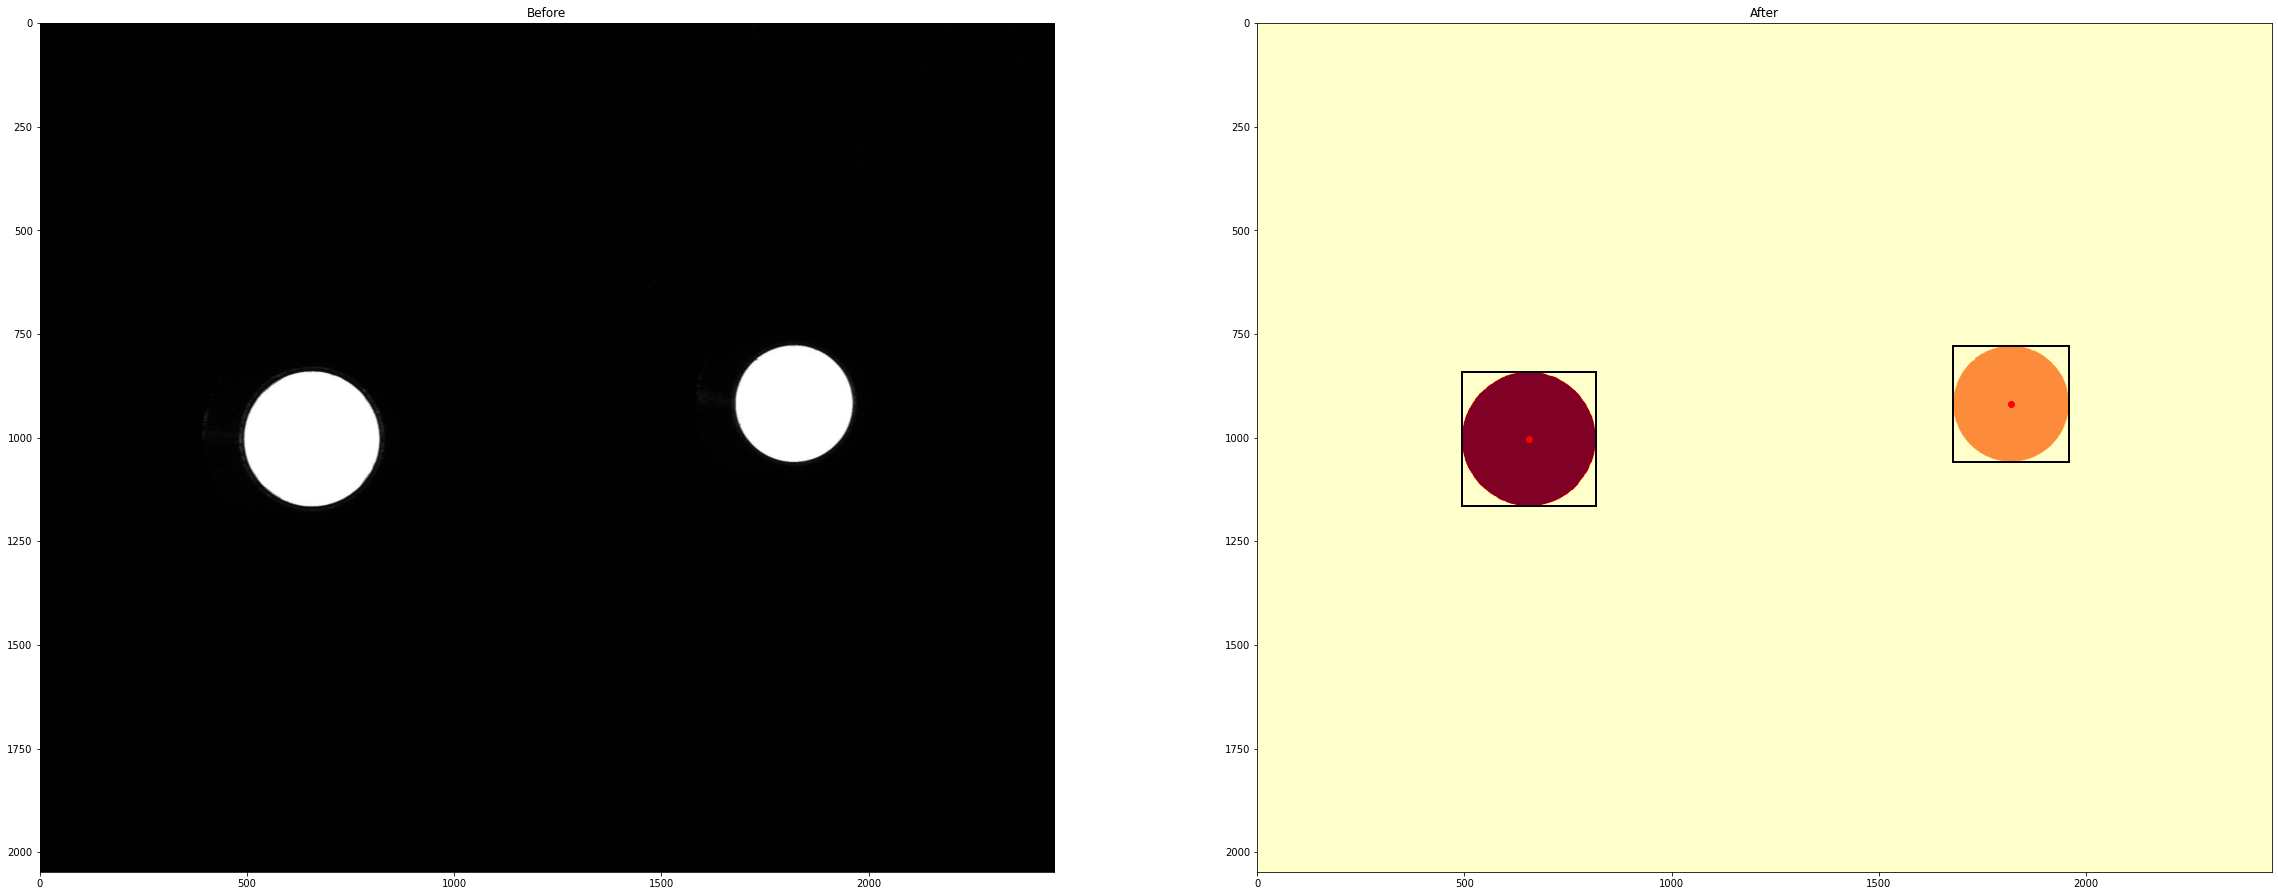

In [26]:
import numpy
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skimage.morphology  import label
from skimage.measure import regionprops
from skimage.filters.thresholding import threshold_otsu
import matplotlib.pyplot as plt

# Opening the image and converting it to grayscale.
a = Image.open('/content/drive/MyDrive/DIP colab/RCIMD_SC_TEST1.jpg').convert('L')
# a is converted to an ndarray.
a = numpy.asarray(a)
# Threshold value is determined by
# using Otsu's method.
thresh = threshold_otsu(a)
print('thresh=',thresh)
# The pixels with intensity greater than
# "theshold" are kept.
b = a > 220
# Labelling is performed on b.

plt.imshow(b)

c = label(b)
# c is saved as label_output.png

# On the labelled image c, regionprops is performed
d = regionprops(c)

fig, ax = plt.subplots(ncols=1,nrows=1,
     figsize=(6, 6))
# plots the label image on the
# previous plot using colormap
ax.imshow(c, cmap='YlOrRd')




for i in d:
    # Printing the x and y values of the
    # centroid where centroid[1] is the x value
    # and centroid[0] is the y value.
    print(i.centroid[1], i.centroid[0])
    # Plot a red circle at the centroid, ro stands
    # for red.
    plt.plot(i.centroid[1],i.centroid[0],'ro')
    # In the bounding box, (lr,lc) are the
    # co-ordinates of the lower left corner and
    # (ur,uc) are the co-ordinates
    # of the top right corner.
    lr, lc, ur, uc = i.bbox
    # The width and the height of the bounding box
    # is computed.
    rec_width = uc - lc
    rec_height = ur - lr

    # Rectangular boxes with
	# origin at (lr,lc) are drawn.
    rect = mpatches.Rectangle((lc, lr),rec_width,
           rec_height,fill=False,edgecolor='black',
           linewidth=2)
    # This adds the rectangular boxes to the plot.
    ax.add_patch(rect)
# Saving the figure
plt.savefig('/content/drive/MyDrive/DIP colab/OUTPUT/RCIMD_SC_TEST1_output1.jpg')
plt.show()


c1 = label(b)
# c is saved as label_output.png

# On the labelled image c, regionprops is performed
d1 = regionprops(c1)

fig = plt.figure(figsize=(40, 40))
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(a, cmap='gray')
ax.set_title('Before')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(c1,  cmap='YlOrRd')
ax.set_title('After')




for i in d1:
    # Printing the x and y values of the
    # centroid where centroid[1] is the x value
    # and centroid[0] is the y value.
    print(i.centroid[1], i.centroid[0])
    # Plot a red circle at the centroid, ro stands
    # for red.
    plt.plot(i.centroid[1],i.centroid[0],'ro')
    # In the bounding box, (lr,lc) are the
    # co-ordinates of the lower left corner and
    # (ur,uc) are the co-ordinates
    # of the top right corner.
    lr, lc, ur, uc = i.bbox
    # The width and the height of the bounding box
    # is computed.
    rec_width = uc - lc
    rec_height = ur - lr

    # Rectangular boxes with
	# origin at (lr,lc) are drawn.
    rect = mpatches.Rectangle((lc, lr),rec_width,
           rec_height,fill=False,edgecolor='black',
           linewidth=2)
    # This adds the rectangular boxes to the plot.
    ax.add_patch(rect)

plt.savefig('/content/drive/MyDrive/DIP colab/OUTPUT/RCIMD_SC_TEST1_c1.png')
plt.show()


#### Hough Line

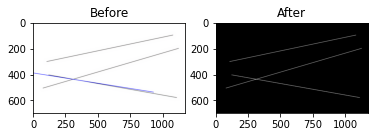

[[[385.          1.727876 ]]

 [[525.          1.2566371]]

 [[285.          1.4137168]]

 [[225.          1.8849556]]

 [[245.          1.8849556]]

 [[495.          1.0995574]]

 [[565.          1.0995574]]

 [[425.          1.4137168]]

 [[495.          1.4137168]]

 [[445.          1.4137168]]

 [[465.          1.4137168]]

 [[545.          1.0995574]]

 [[345.          1.2566371]]

 [[285.          1.8849556]]

 [[375.          1.2566371]]

 [[325.          1.2566371]]

 [[325.          1.8849556]]]


In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Opening the image.
im = cv2.imread('/content/drive/MyDrive/DIP colab/hlines.png')
# Converting the image to grayscale.
a1 = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
# Thresholding the image to obtain 
# only foreground pixels.
thresh, b1 = cv2.threshold(a1, 0, 255,
            cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

cv2.imwrite('/content/drive/MyDrive/DIP colab/OUTPUT/hlines_thresh.png', b1)
# Performing the Hough lines transform.
lines = cv2.HoughLines(b1, 10, np.pi/20, 200)
for rho, theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(im,(x1,y1),(x2,y2),(0,0,255),2)
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(im, cmap='gray')
ax.set_title('Before')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(b1, cmap='gray')
ax.set_title('After')
plt.show()

# Printing the lines: distance and angle in radians.
print(lines)

#### Hough Circle

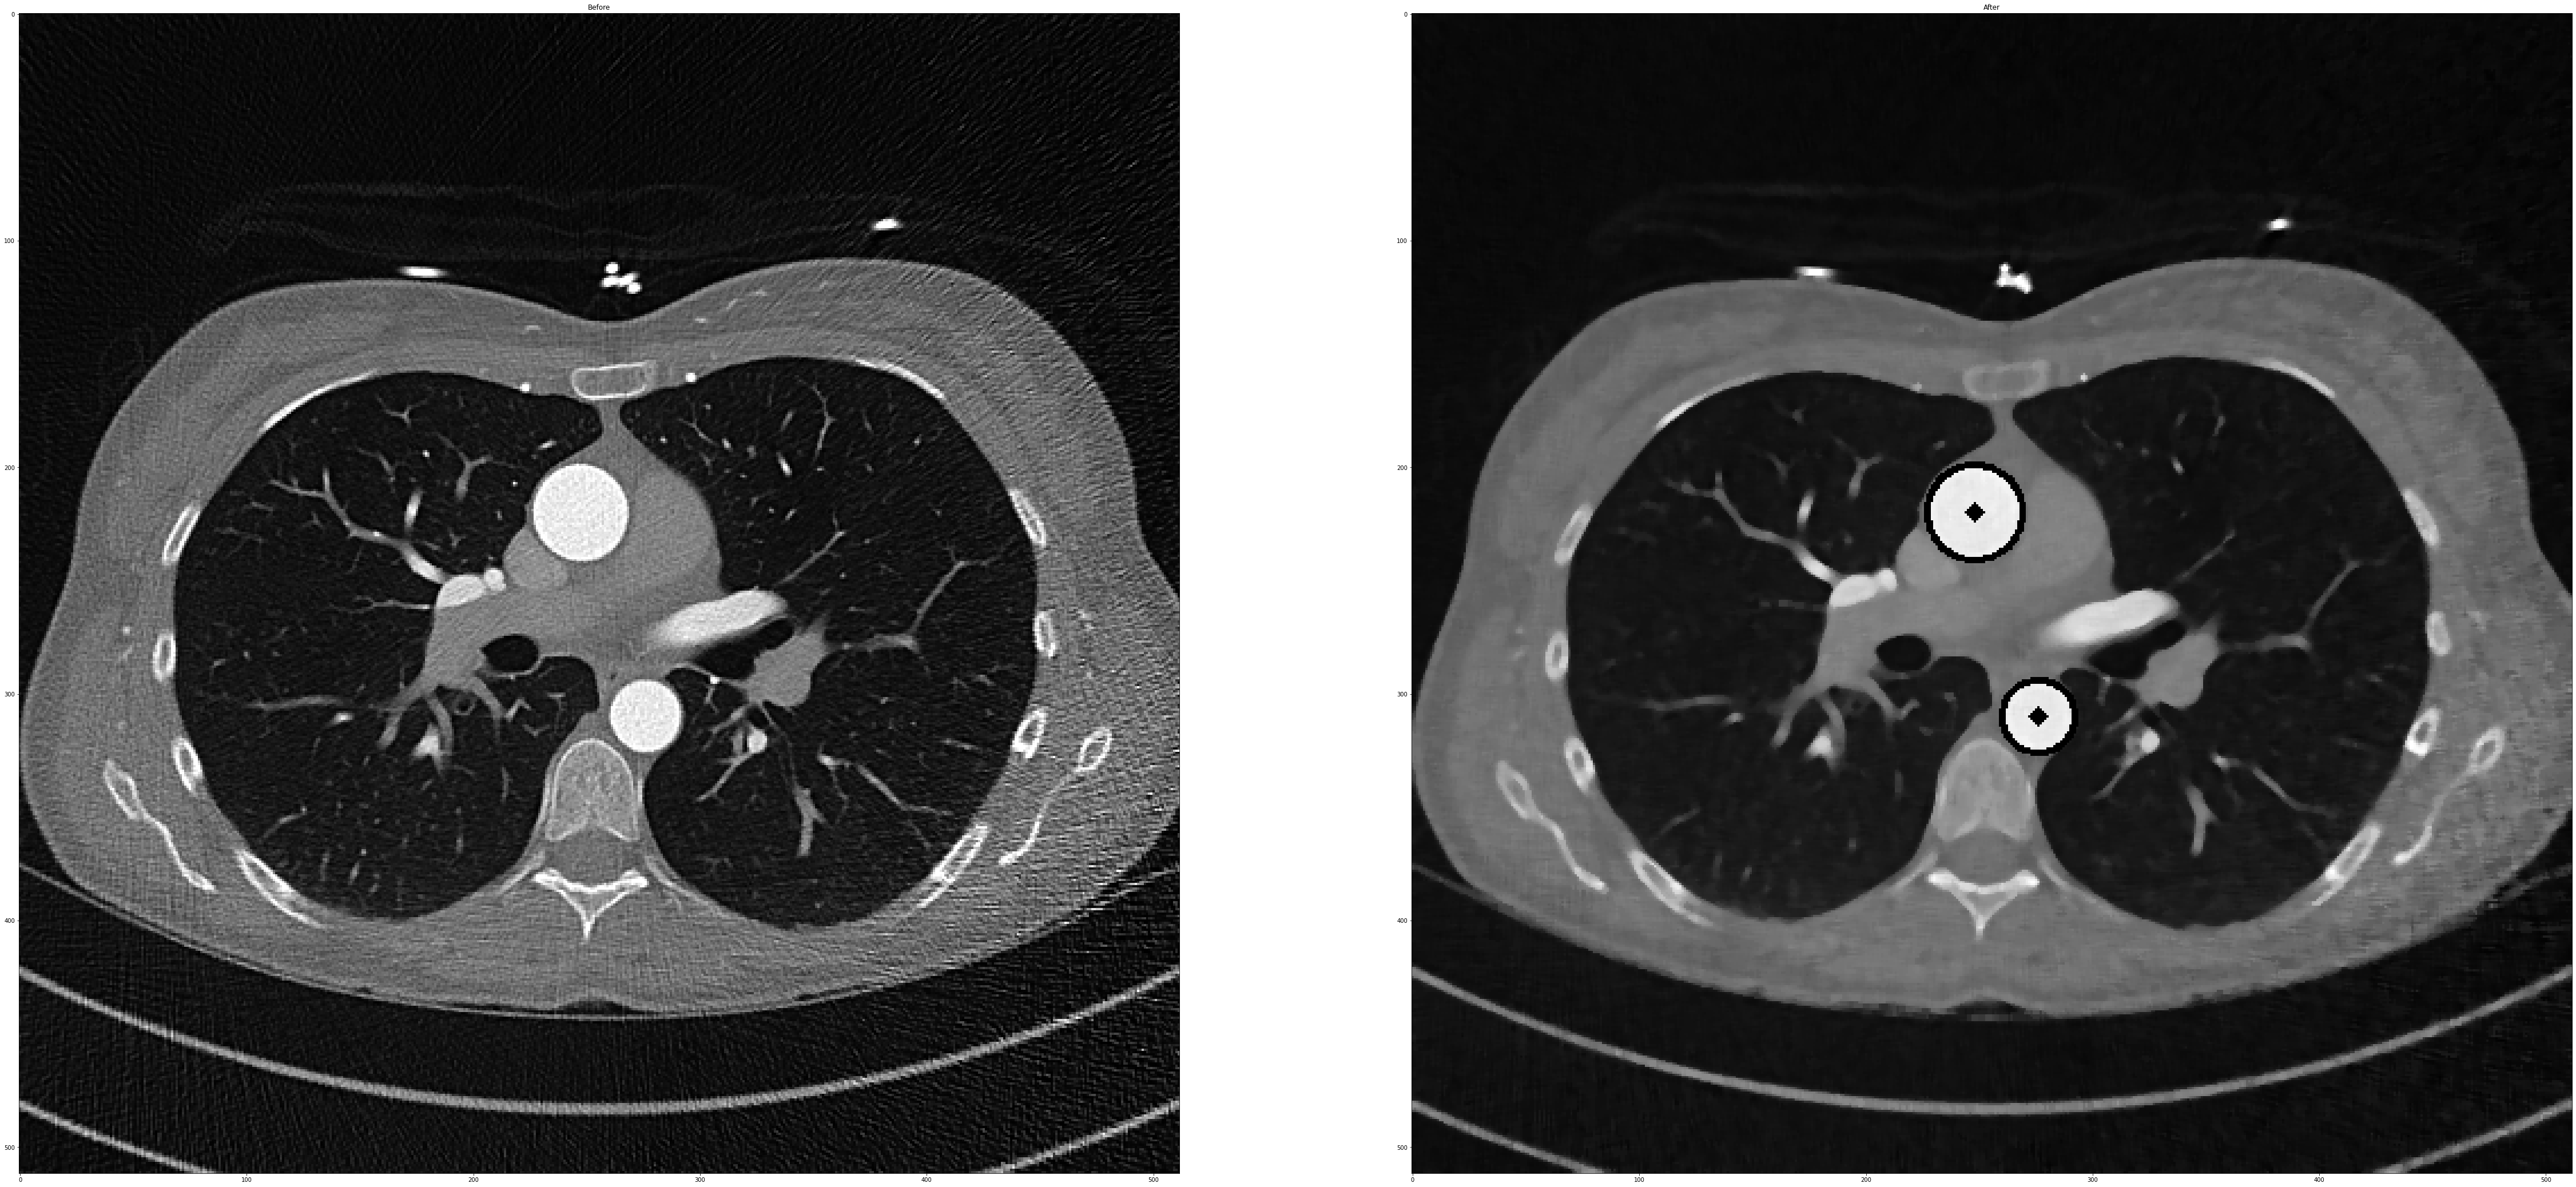

In [39]:
import numpy as np
import scipy.ndimage
from PIL import Image
import cv2
import matplotlib.pyplot as plt

# opening the image and converting it to grayscale
a = Image.open('/content/drive/MyDrive/DIP colab/withcontrast1.png')
a = a.convert('L')
# Median filter is performed on the
# image to remove noise.
img = scipy.ndimage.filters.median_filter(a,size=5)
# Circles are determined using
# Hough circles transform.
circles = cv2.HoughCircles(img,
          cv2.HOUGH_GRADIENT,1,10,param1=100,
          param2=30,minRadius=10,maxRadius=30)
# circles image is rounded to unsigned integer 16.
circles = np.uint16(np.around(circles))
# For each detected circle.
for i in circles[0,:]:
	# An outer circle is drawn for visualization.
    cv2.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
	# its center is marked
    cv2.circle(img,(i[0],i[1]),2,(0,0,255),3)
# Saving the image as houghcircles_output.png
fig = plt.figure(figsize=(80, 80))
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(a, cmap='gray')
ax.set_title('Before')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(img, cmap='gray')
ax.set_title('After')
plt.show()

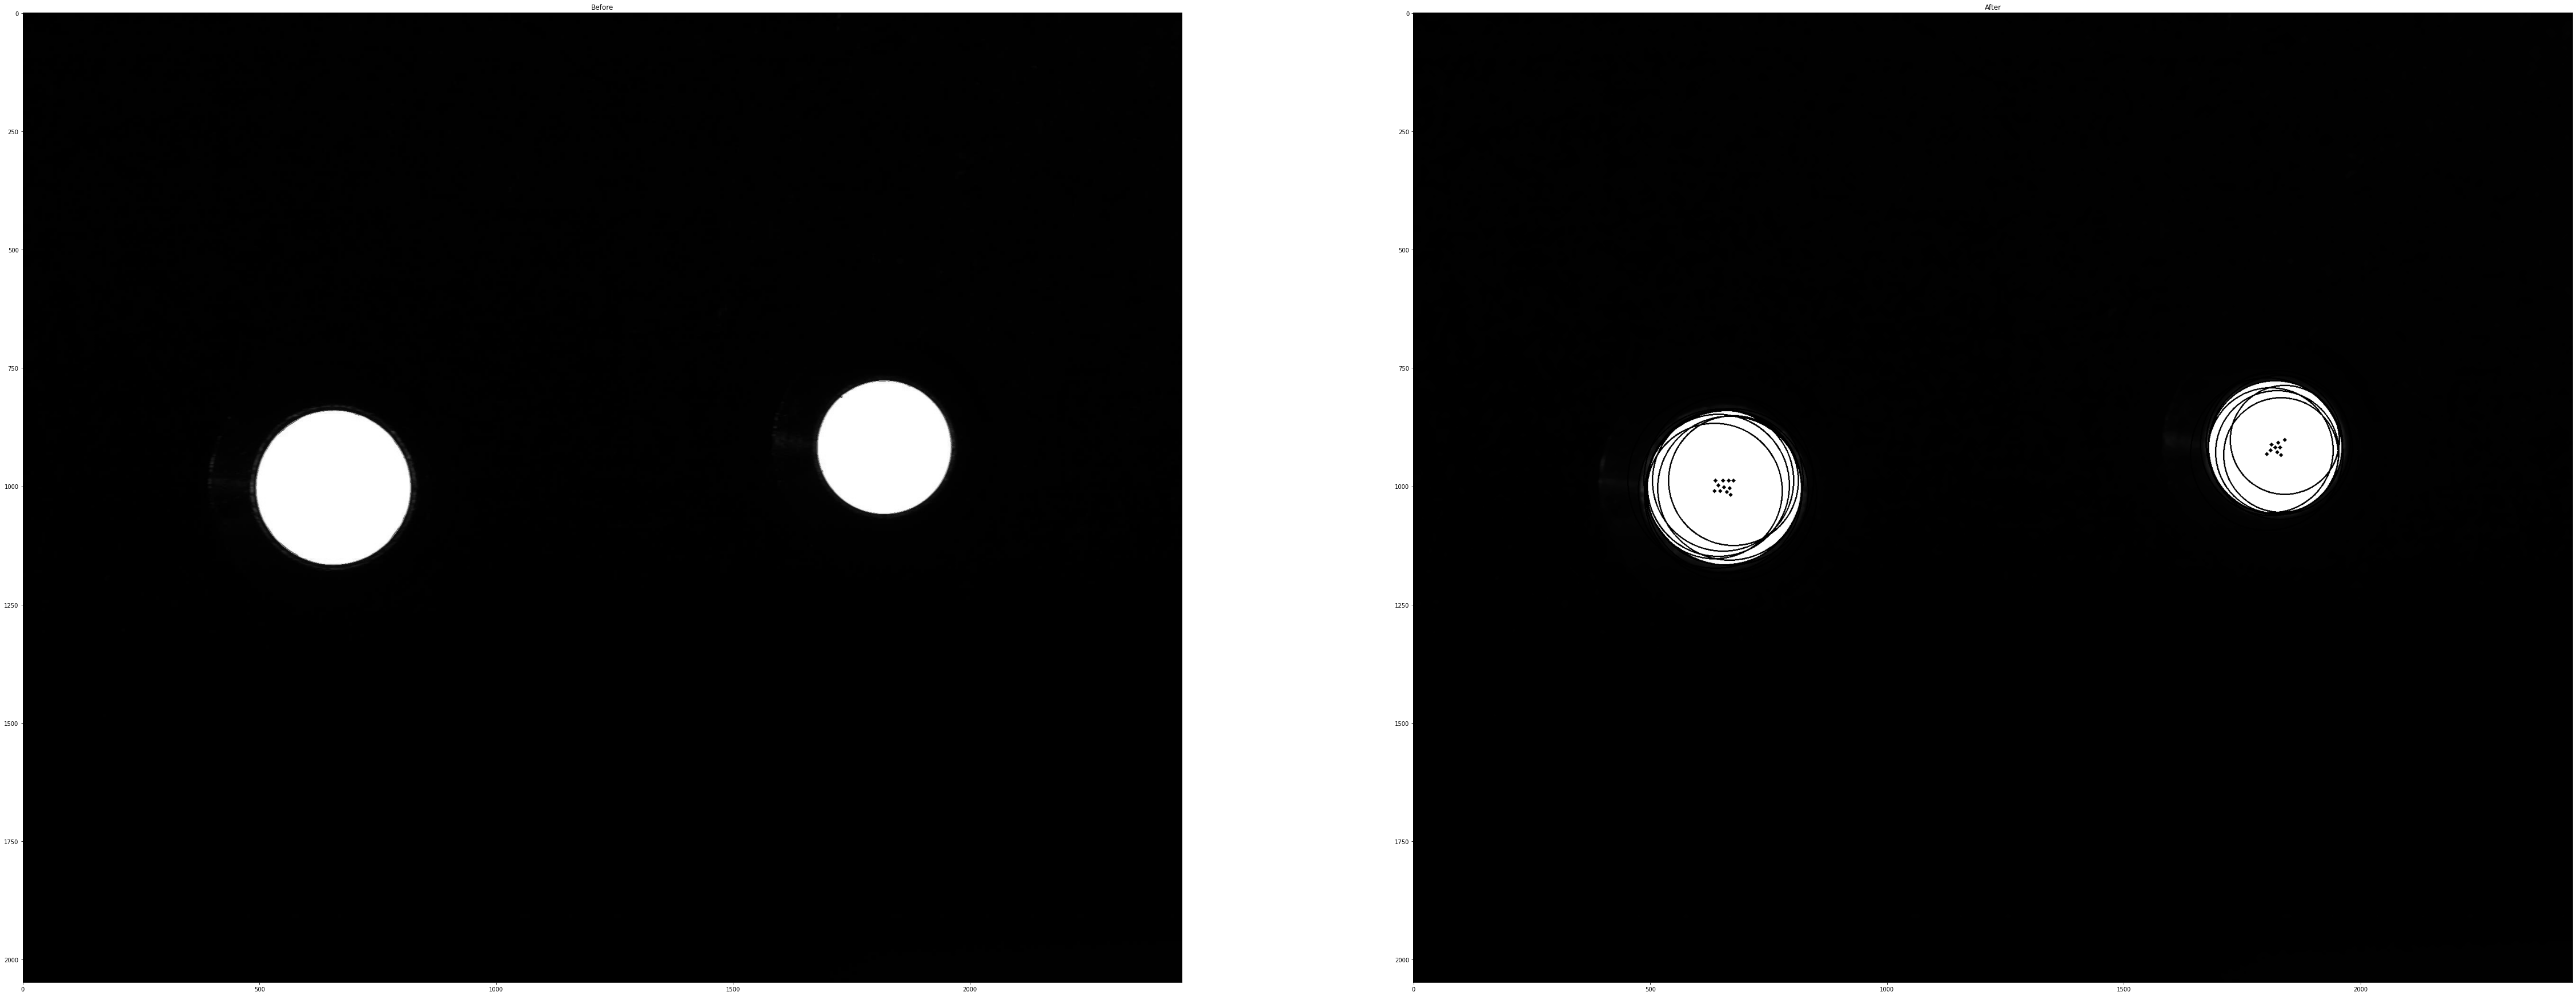

In [47]:
import numpy as np
import scipy.ndimage
from PIL import Image
import cv2
import matplotlib.pyplot as plt

# opening the image and converting it to grayscale
a = Image.open('/content/drive/MyDrive/DIP colab/RCIMD_SC_TEST1.jpg')
a = a.convert('L')
# Median filter is performed on the
# image to remove noise.
img = scipy.ndimage.filters.median_filter(a,size=10)
# Circles are determined using
# Hough circles transform.
circles = cv2.HoughCircles(img,
          cv2.HOUGH_GRADIENT,1,10,param1=100,
          param2=30,minRadius=100,maxRadius=300)
# circles image is rounded to unsigned integer 16.
circles = np.uint16(np.around(circles))
# For each detected circle.
for i in circles[0,:]:
	# An outer circle is drawn for visualization.
    cv2.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
	# its center is marked
    cv2.circle(img,(i[0],i[1]),2,(0,0,255),3)
# Saving the image as houghcircles_output.png
fig = plt.figure(figsize=(80, 80))
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(a, cmap='gray')
ax.set_title('Before')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(img, cmap='gray')
ax.set_title('After')
plt.savefig('/content/drive/MyDrive/DIP colab/OUTPUT/RCIMD_SC_TEST1_1_Hough Circle.png')
plt.show()

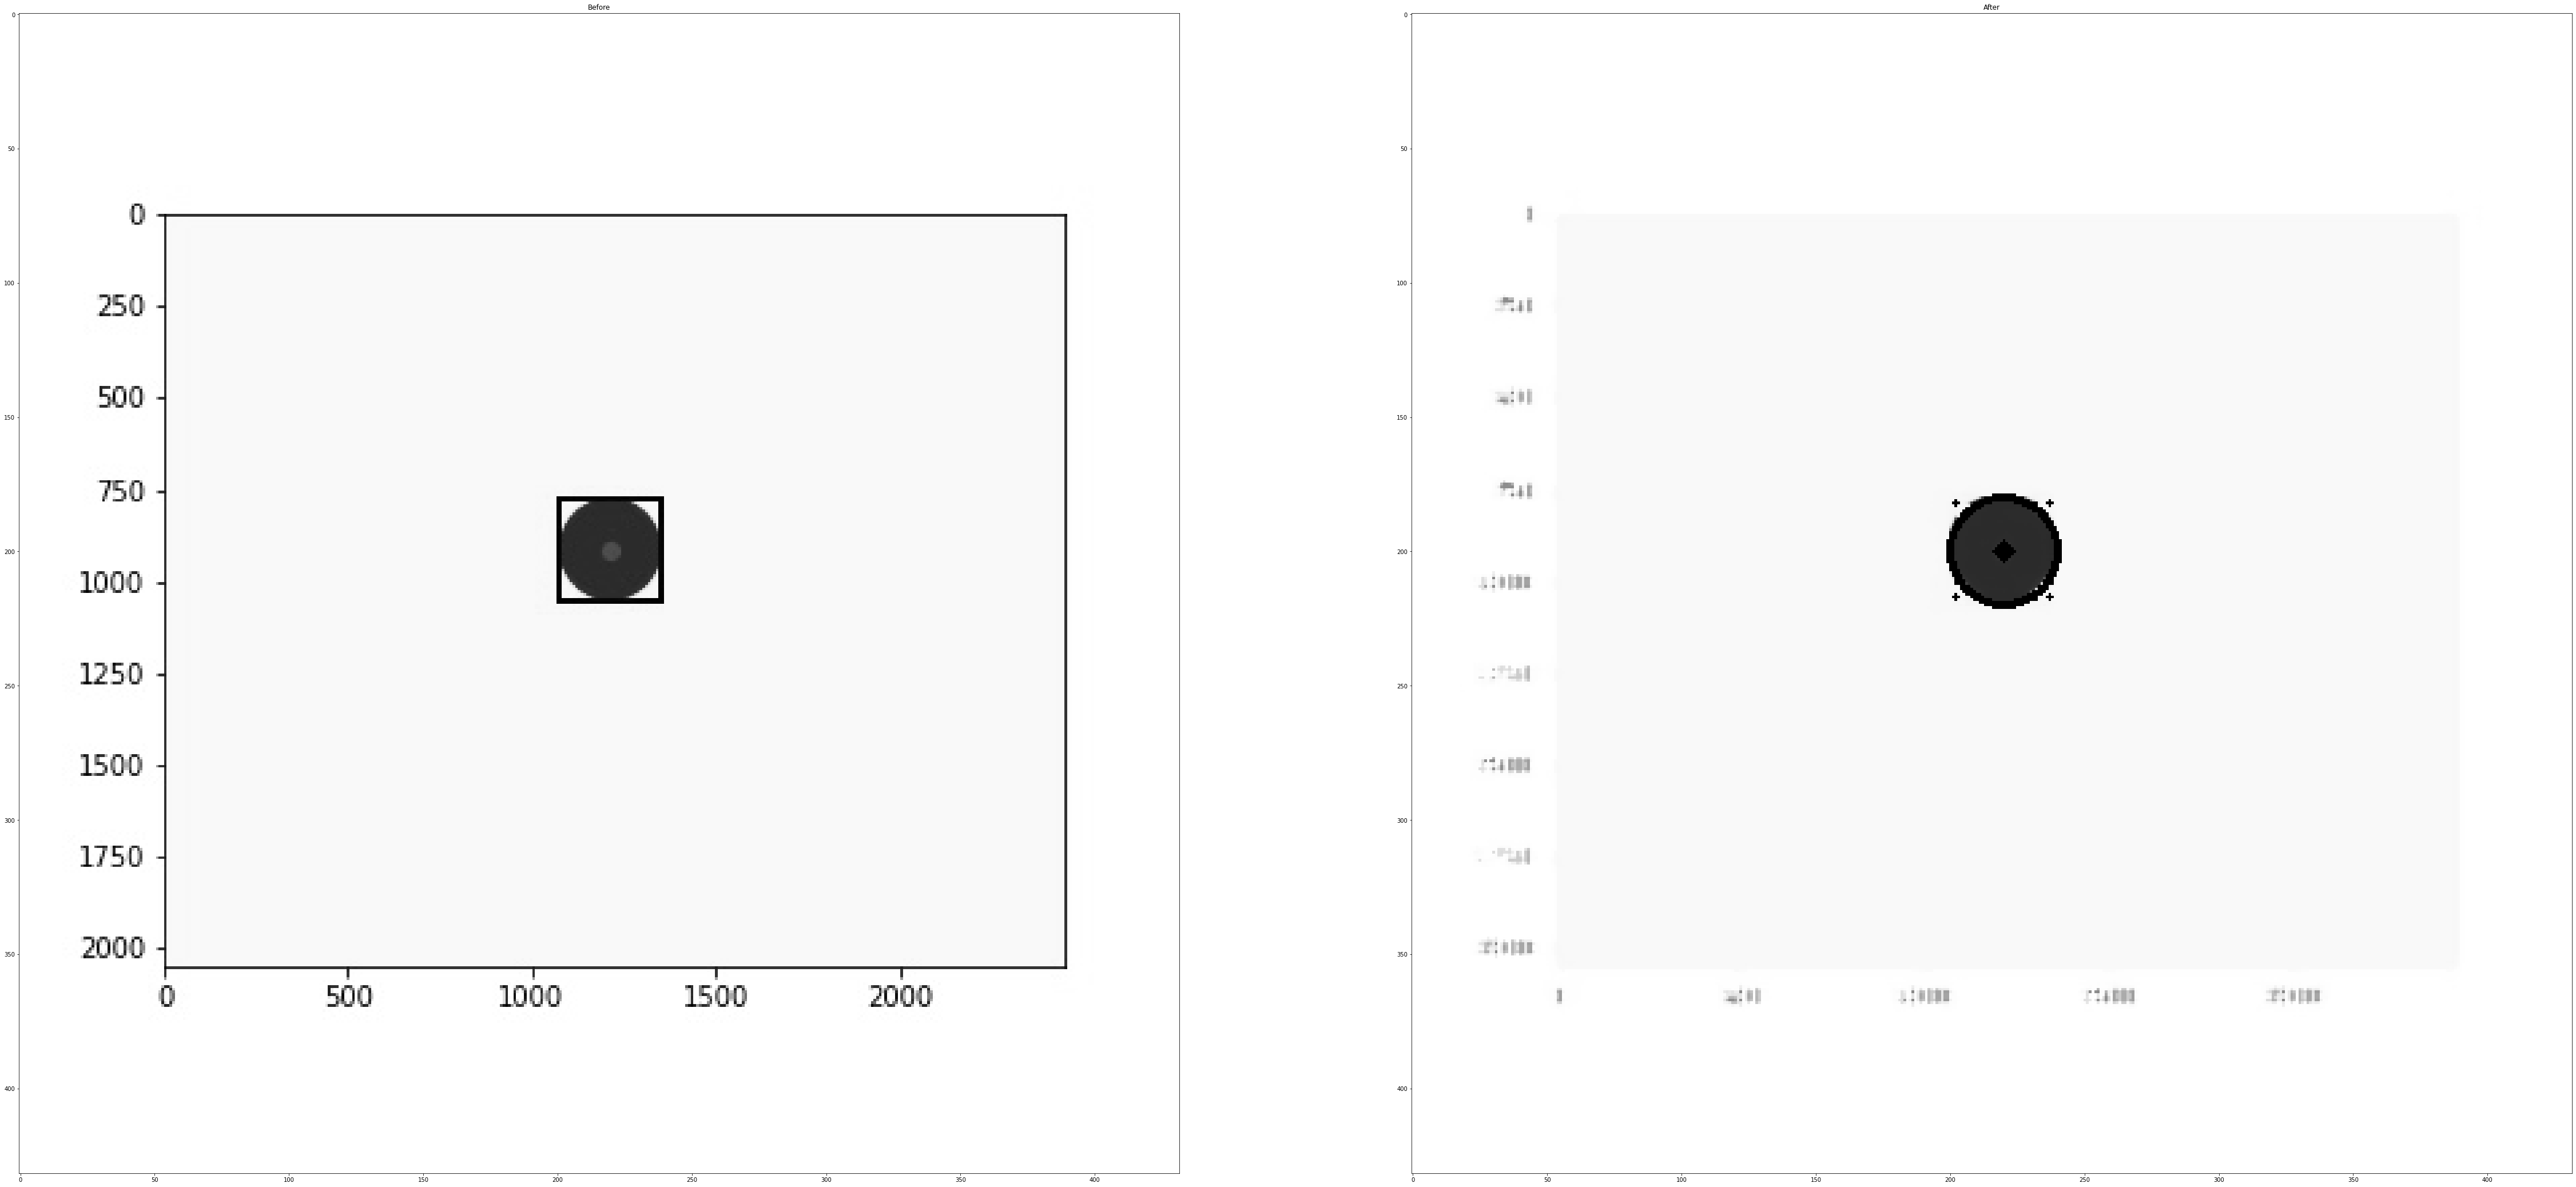

In [38]:
import numpy as np
import scipy.ndimage
from PIL import Image
import cv2
import matplotlib.pyplot as plt

# opening the image and converting it to grayscale
a = Image.open('/content/drive/MyDrive/DIP colab/OUTPUT/RCIMD_SC_TEST3_output3.jpg')
a = a.convert('L')
# Median filter is performed on the
# image to remove noise.
img = scipy.ndimage.filters.median_filter(a,size=5)
# Circles are determined using
# Hough circles transform.
circles = cv2.HoughCircles(img,
          cv2.HOUGH_GRADIENT,1,10,param1=100,
          param2=30,minRadius=10,maxRadius=30)
# circles image is rounded to unsigned integer 16.
circles = np.uint16(np.around(circles))
# For each detected circle.
for i in circles[0,:]:
	# An outer circle is drawn for visualization.
    cv2.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
	# its center is marked
    cv2.circle(img,(i[0],i[1]),2,(0,0,255),3)
# Saving the image as houghcircles_output.png
fig = plt.figure(figsize=(80, 80))
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(a, cmap='gray')
ax.set_title('Before')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(img, cmap='gray')
ax.set_title('After')
plt.savefig('/content/drive/MyDrive/DIP colab/OUTPUT/RCIMD_SC_TEST3_Hough Circle.png')
plt.show()

#### Template Matching

The number of seats are: 261


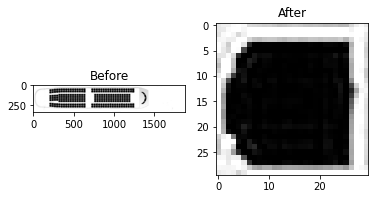

In [48]:
import cv2
import numpy
from PIL import Image
from skimage.morphology  import label
from skimage.measure import regionprops
from skimage.feature import match_template
import matplotlib.pyplot as plt

# Opening the image and converting it to grayscale.
image = Image.open('/content/drive/MyDrive/DIP colab/airline_seating.png')
image = image.convert('L')
# Converting the input image into an ndarray.
image = numpy.asarray(image)
# Reading the template image.
temp = Image.open('/content/drive/MyDrive/DIP colab/template1.png')
temp = temp.convert('L')
# Converting the template into an ndarray.
temp = numpy.asarray(temp)
# Performing template matching.
result = match_template(image, temp)
thresh = 0.7
# Thresholding the result from template
# matching considering pixel values where the
# normalized cross-correlation is greater than 0.7.
res = result > thresh
# Labeling the thresholded image.
c = label(res, background=0)
# Performing regionprops to count the
# number of label.
reprop = regionprops(c)
print("The number of seats are:", len(reprop))
# Converting the binary image to an 8-bit for storing.
res = res*255
# Converting the ndarray to image.
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(image, cmap='gray')
ax.set_title('Before')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(temp, cmap='gray')
ax.set_title('After')
plt.show()

#### FAST Corner Detector

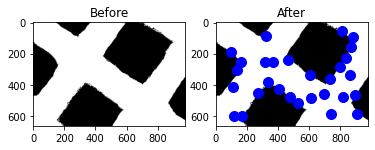

In [50]:
import numpy as np
from PIL import Image
from skimage.feature import corner_peaks
from skimage.feature import corner_subpix, corner_fast
from matplotlib import pyplot as plt

# Image is opened and is converted to grayscale.
img = Image.open('/content/drive/MyDrive/DIP colab/corner_detector.png').convert('L')
# img is converted to an ndarray.
img1 = np.asarray(img)

corner_response = corner_fast(img1)
cpv = corner_peaks(corner_response, min_distance=50)
corners_subpix_val = corner_subpix(img1, cpv, window_size=13)

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img, cmap='gray')
ax.set_title('Before')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(img1, cmap='gray')
ax.set_title('After')
x = corners_subpix_val[:, 1]
y = corners_subpix_val[:, 0]
ax.plot(x, y, 'ob', markersize=10)
plt.show()

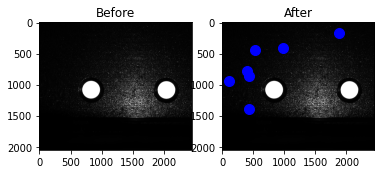

In [52]:
import numpy as np
from PIL import Image
from skimage.feature import corner_peaks
from skimage.feature import corner_subpix, corner_fast
from matplotlib import pyplot as plt

# Image is opened and is converted to grayscale.
img = Image.open('/content/drive/MyDrive/DIP colab/RCIMD_SC_TEST2.jpg').convert('L')
# img is converted to an ndarray.
img1 = np.asarray(img)

corner_response = corner_fast(img1)
cpv = corner_peaks(corner_response, min_distance=50)
corners_subpix_val = corner_subpix(img1, cpv, window_size=13)

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img, cmap='gray')
ax.set_title('Before')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(img1, cmap='gray')
ax.set_title('After')
x = corners_subpix_val[:, 1]
y = corners_subpix_val[:, 0]
ax.plot(x, y, 'ob', markersize=10)
plt.show()

#### Harris Corner Detector

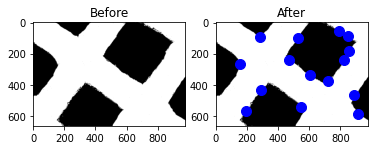

In [53]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from skimage.feature import corner_harris
from skimage.feature import corner_peaks, corner_subpix

# Opening image and converting it into grayscale.
img = Image.open('/content/drive/MyDrive/DIP colab/corner_detector.png').convert('L')
# img is converted to an ndarray.
img1 = np.asarray(img)

# Detecting corners using Harris.
corner_response = corner_harris(img1, k=0.2)
# Detecting peak values.
corners_peak_val = corner_peaks(corner_response, 50)

corners_subpix_val = corner_subpix(img1, corners_peak_val, 13)
# Defining a subplot.
# Displaying the image.
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img, cmap='gray')
ax.set_title('Before')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(img1, cmap='gray')
ax.set_title('After')
x = corners_subpix_val[:, 1]
y = corners_subpix_val[:, 0]
ax.plot(x, y, 'ob', markersize=10)
plt.show()

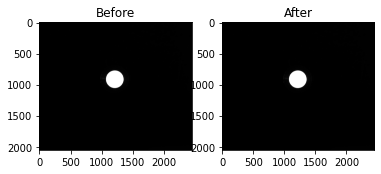

In [56]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from skimage.feature import corner_harris
from skimage.feature import corner_peaks, corner_subpix

# Opening image and converting it into grayscale.
img = Image.open('/content/drive/MyDrive/DIP colab/RCIMD_SC_TEST3.jpg').convert('L')
# img is converted to an ndarray.
img1 = np.asarray(img)

# Detecting corners using Harris.
corner_response = corner_harris(img1, k=0.2)
# Detecting peak values.
corners_peak_val = corner_peaks(corner_response, 50)

corners_subpix_val = corner_subpix(img1, corners_peak_val, 13)
# Defining a subplot.
# Displaying the image.
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img, cmap='gray')
ax.set_title('Before')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(img1, cmap='gray')
ax.set_title('After')
x = corners_subpix_val[:, 1]
y = corners_subpix_val[:, 0]
ax.plot(x, y, 'ob', markersize=10)
plt.show()